### Read data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('auto_mpg.csv').convert_dtypes()
df.iloc[ :5 , ]

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130,3504,12.0,70,India
1,15.0,8,350.0,165,3693,11.5,70,India
2,18.0,8,318.0,150,3436,11.0,70,India
3,16.0,8,304.0,150,3433,12.0,70,India
4,17.0,8,302.0,140,3449,10.5,70,India


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    Float64
 1   1       398 non-null    Int64  
 2   2       398 non-null    Float64
 3   3       392 non-null    Int64  
 4   4       398 non-null    Int64  
 5   5       398 non-null    Float64
 6   6       398 non-null    Int64  
 7   7       398 non-null    string 
dtypes: Float64(3), Int64(4), string(1)
memory usage: 27.7 KB


In [3]:
cols = df.columns
new_cols = {cols[0]: 'MPG',
            cols[1]: 'Cylinders',
            cols[2]: 'Displacement',
            cols[3]: 'Horsepower',
            cols[4]: 'Weight',
            cols[5]: 'Acceleration',
            cols[6]: 'Model Year',
            cols[-1]: 'Origin'}
df = df.rename(columns=new_cols)

In [4]:
df.iloc[:10 ,]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130,3504,12.0,70,India
1,15.0,8,350.0,165,3693,11.5,70,India
2,18.0,8,318.0,150,3436,11.0,70,India
3,16.0,8,304.0,150,3433,12.0,70,India
4,17.0,8,302.0,140,3449,10.5,70,India
5,15.0,8,429.0,198,4341,10.0,70,India
6,14.0,8,454.0,220,4354,9.0,70,India
7,14.0,8,440.0,215,4312,8.5,70,India
8,14.0,8,455.0,225,4425,10.0,70,India
9,15.0,8,390.0,190,3850,8.5,70,India


### Explore data

In [5]:
df.shape

(398, 8)

In [6]:
df.dtypes

MPG                    Float64
Cylinders                Int64
Displacement           Float64
Horsepower               Int64
Weight                   Int64
Acceleration           Float64
Model Year               Int64
Origin          string[python]
dtype: object

In [7]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    Float64
 1   Cylinders     398 non-null    Int64  
 2   Displacement  398 non-null    Float64
 3   Horsepower    392 non-null    Int64  
 4   Weight        398 non-null    Int64  
 5   Acceleration  398 non-null    Float64
 6   Model Year    398 non-null    Int64  
 7   Origin        398 non-null    string 
dtypes: Float64(3), Int64(4), string(1)
memory usage: 27.7 KB


#### Display null rows

In [41]:
# See the null rows
df[df['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,<NA>,2046,19.0,71,India
126,21.0,6,200.0,<NA>,2875,17.0,74,India
330,40.9,4,85.0,<NA>,1835,17.3,80,USA
336,23.6,4,140.0,<NA>,2905,14.3,80,India
354,34.5,4,100.0,<NA>,2320,15.8,81,USA
374,23.0,4,151.0,<NA>,3035,20.5,82,India


#### Display Quantitative summary and distribution

In [44]:
# statistics for numerical columns
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.0,398.0,398.0,392.0,398.0,398.0,398.0
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.56809,76.01005
std,7.815984,1.701004,104.269838,38.49116,846.841774,2.757689,3.697627
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
25%,17.5,4.0,104.25,75.0,2223.75,13.825,73.0
50%,23.0,4.0,148.5,93.5,2803.5,15.5,76.0
75%,29.0,8.0,262.0,126.0,3608.0,17.175,79.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0


In [45]:
#frequencies
df['Origin'].value_counts()

Origin
India      249
Germany     79
USA         70
Name: count, dtype: Int64

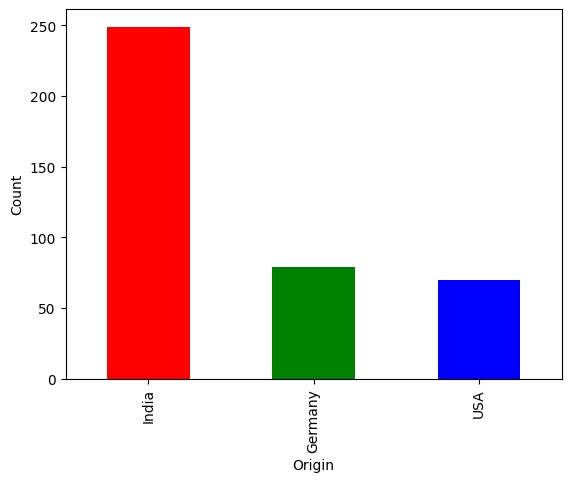

In [36]:
df['Origin'].value_counts().plot(kind='bar', ylabel='Count',color=['r', 'g', 'b']);

### Create new features from exising columns

In [48]:
df['DPU'] = (df.Displacement / df.Horsepower).round(2)

In [50]:
df['WPC'] = (df.Weight / df.Cylinders).round(2)

In [51]:
df['APU'] = (df.Acceleration / df.Horsepower).round(2)

In [52]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,DPU,WPC,APU
0,18.0,8,307.0,130,3504,12.0,70,India,2.36,438.0,0.09
1,15.0,8,350.0,165,3693,11.5,70,India,2.12,461.62,0.07
2,18.0,8,318.0,150,3436,11.0,70,India,2.12,429.5,0.07
3,16.0,8,304.0,150,3433,12.0,70,India,2.03,429.12,0.08
4,17.0,8,302.0,140,3449,10.5,70,India,2.16,431.12,0.08
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,India,1.63,697.5,0.18
394,44.0,4,97.0,52,2130,24.6,82,USA,1.87,532.5,0.47
395,32.0,4,135.0,84,2295,11.6,82,India,1.61,573.75,0.14
396,28.0,4,120.0,79,2625,18.6,82,India,1.52,656.25,0.24
